# Predictive Modeling - Multi-label Classification

<i>Author: Jamell Dacon</i>

In [1]:
# Load in models and packages necessary for datasets
# Importing individual libraries make it easy for us to use them without having to call the parent libraries
import math
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# Visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Managing Warnings i.e. Deprecation warnings
import warnings
warnings.filterwarnings('ignore')

## Multilabel

### Training Set


In [2]:
# Load in data
train = pd.read_json("data/train.json")

# Display columns independently 
train_labels = pd.DataFrame(train['label'].tolist())
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_attack']
train_labels.columns = categories

train_df = pd.concat([train, train_labels], axis = 1)
#train_df = train_df.drop(['label'], axis=1)

#Display full df
print("Train shape:", train.shape)
train_df.head()

Train shape: (7944, 2)


,text,label,toxic,severe_toxic,obscene,threat,insult,identity_attack
0,roxane gay is so goddamned weird on social media.,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0]",1.0,0.0,1.0,0.0,1.0,1.0
1,not all gays are pedos you stupid faggot milo ...,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0]",1.0,0.0,1.0,0.0,1.0,1.0
2,that doesnt though because being gay is shitty...,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0]",1.0,0.0,1.0,0.0,1.0,1.0
3,they were confused by a game did a backflip an...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,0.0,0.0,0.0,0.0,0.0
4,fag homosexuals are the worst kind of homosexual.,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0]",1.0,0.0,1.0,0.0,1.0,1.0


Text(0.5, 0, 'Labels')

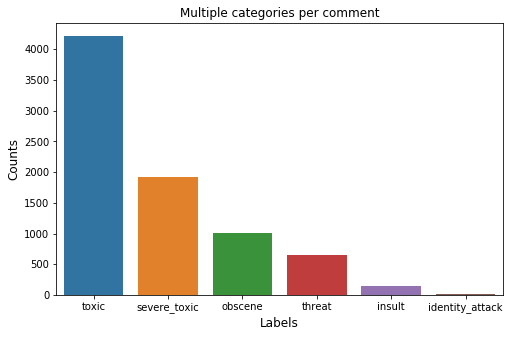

In [3]:
rowsums = train_df.iloc[:,3:].sum(axis=1)
x = rowsums.value_counts()

#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(categories, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Labels', fontsize=12)

In [18]:
train_df['identity_attack'].value_counts()

0.0    4345
1.0    3599
Name: identity_attack, dtype: int64

### Testing Set

In [4]:
# Load in data 
test = pd.read_json("data/test.json")

# Display columns independently 
test_labels = pd.DataFrame(test['label'].tolist())
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_attack']
test_labels.columns = categories

test_df = pd.concat([test, test_labels], axis = 1)
#test_df = test_df.drop(['label'], axis=1)

#Display full df
print("Test shape:", test.shape)
test_df.head()

Test shape: (1986, 2)


,text,label,toxic,severe_toxic,obscene,threat,insult,identity_attack
0,but im not gay gay people are sin,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1.0,0.0,0.0,0.0,0.0,0.0
1,that ones always a classic gotta love me some ...,"[1.0, 0.0, 0.0, 0.0, 1.0, 1.0]",1.0,0.0,0.0,0.0,1.0,1.0
2,vile evil bitch gay is a disease that needs to...,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0]",1.0,1.0,1.0,0.0,1.0,1.0
3,all homosexuals are pedophiles upright,"[1.0, 0.0, 0.0, 0.0, 1.0, 1.0]",1.0,0.0,0.0,0.0,1.0,1.0
4,i can confirm lesbians are not weird and disgu...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Labels')

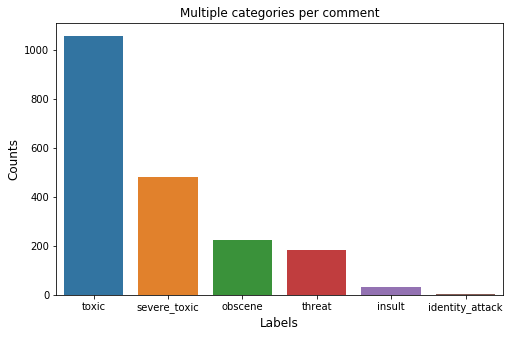

In [5]:
rowsums = test_df.iloc[:,3:].sum(axis=1)
x = rowsums.value_counts()

#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(categories, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Labels', fontsize=12)

### Train/ Test Splits

In [6]:
# Training set 
X_train = train_df.text
X_test = test_df.text

X_train.shape, X_test.shape

((7944,), (1986,))

### Logistic Regression model

In [7]:
LGR_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('Processing {} ...'.format(category))
    LGR_pipeline.fit(X_train, train_df[category])
    
    # compute the testing accuracy
    lgr_preds = LGR_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test_df[category], lgr_preds)))
    
    # Print the classification report of the rf model
    print(classification_report(y_true = test_df[category], y_pred = lgr_preds))


Processing toxic ...
Test accuracy is 0.8091641490433031
              precision    recall  f1-score   support

         0.0       0.73      0.37      0.49       496
         1.0       0.82      0.96      0.88      1490

    accuracy                           0.81      1986
   macro avg       0.78      0.66      0.69      1986
weighted avg       0.80      0.81      0.79      1986

Processing severe_toxic ...
Test accuracy is 0.9848942598187311
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1949
         1.0       0.89      0.22      0.35        37

    accuracy                           0.98      1986
   macro avg       0.94      0.61      0.67      1986
weighted avg       0.98      0.98      0.98      1986

Processing obscene ...
Test accuracy is 0.9300100704934542
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      1691
         1.0       0.97      0.55      0.70       295

  

### Support Vector Machine

In [8]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for category in categories:
    print('Processing {} ...'.format(category))
    SVC_pipeline.fit(X_train, train_df[category])
    
    # compute the testing accuracy
    svm_preds = SVC_pipeline.predict(X_test)
    #
    print('Test accuracy is {}'.format(accuracy_score(test_df[category], svm_preds)))
    
    # Print the classification report of the rf model
    print(classification_report(y_true = test_df[category], y_pred = lgr_preds))


Processing toxic ...
Test accuracy is 0.8167170191339376
              precision    recall  f1-score   support

         0.0       0.40      0.95      0.56       496
         1.0       0.97      0.53      0.68      1490

    accuracy                           0.63      1986
   macro avg       0.68      0.74      0.62      1986
weighted avg       0.83      0.63      0.65      1986

Processing severe_toxic ...
Test accuracy is 0.9879154078549849
              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75      1949
         1.0       0.04      0.95      0.08        37

    accuracy                           0.61      1986
   macro avg       0.52      0.77      0.42      1986
weighted avg       0.98      0.61      0.74      1986

Processing obscene ...
Test accuracy is 0.959718026183283
              precision    recall  f1-score   support

         0.0       0.96      0.66      0.78      1691
         1.0       0.30      0.83      0.44       295

   